# Lending Club (Decision Tree & Random Forest) Project

Columns in dataset represent:
1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2. purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
3. int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4. installment: The monthly installments owed by the borrower if the loan is funded.
5. log.annual.inc: The natural log of the self-reported annual income of the borrower.
6. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7. fico: The FICO credit score of the borrower.
8. days.with.cr.line: The number of days the borrower has had a credit line.
9. revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10. revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11. inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13. pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Optional Library
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# EDA

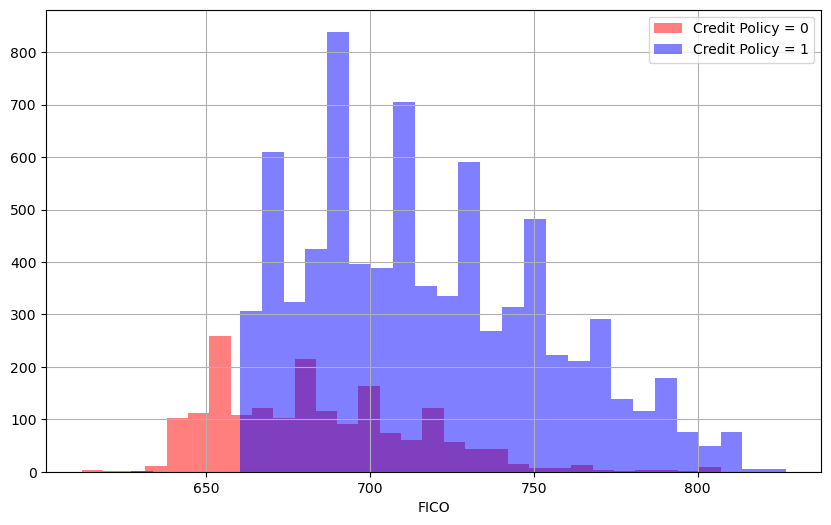

In [11]:
plt.figure(figsize=(10,6))
df[df['credit.policy'] == 0]['fico'].hist(bins=30,color='red',label='Credit Policy = 0',alpha=0.5)
df[df['credit.policy'] == 1]['fico'].hist(bins=30,color='blue',label='Credit Policy = 1',alpha=0.5)
plt.xlabel('FICO')
plt.legend()

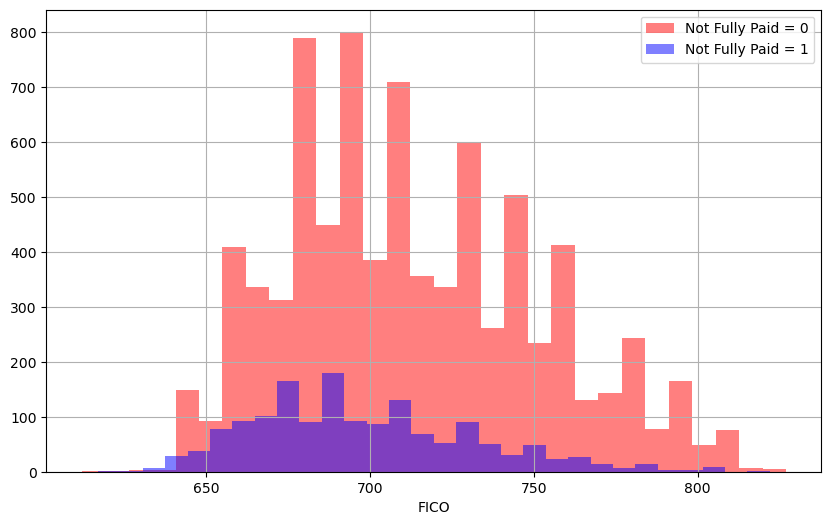

In [10]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid'] == 0]['fico'].hist(bins=30,color='red',label='Not Fully Paid = 0',alpha=0.5)
df[df['not.fully.paid'] == 1]['fico'].hist(bins=30,color='blue',label='Not Fully Paid = 1',alpha=0.5)
plt.xlabel('FICO')
plt.legend()

<AxesSubplot:xlabel='purpose', ylabel='count'>

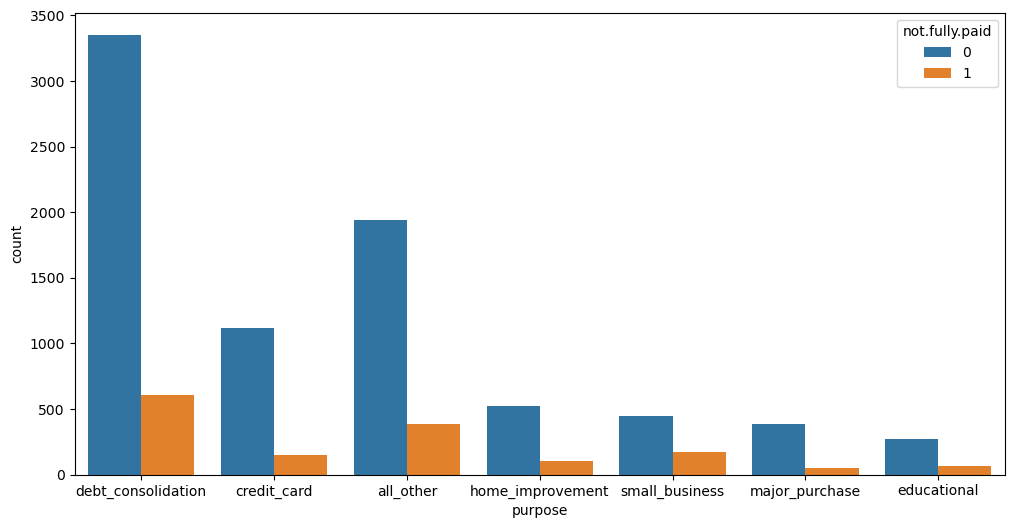

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',data=df,hue='not.fully.paid')

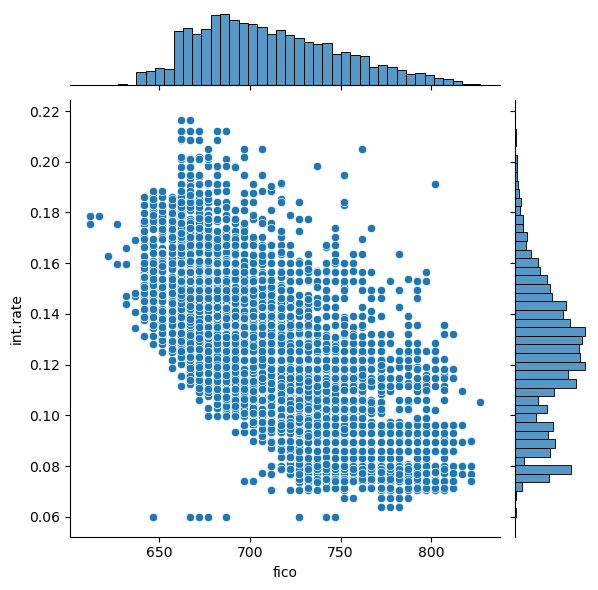

In [17]:
sns.jointplot(x='fico',y='int.rate',data=df,kind='scatter')

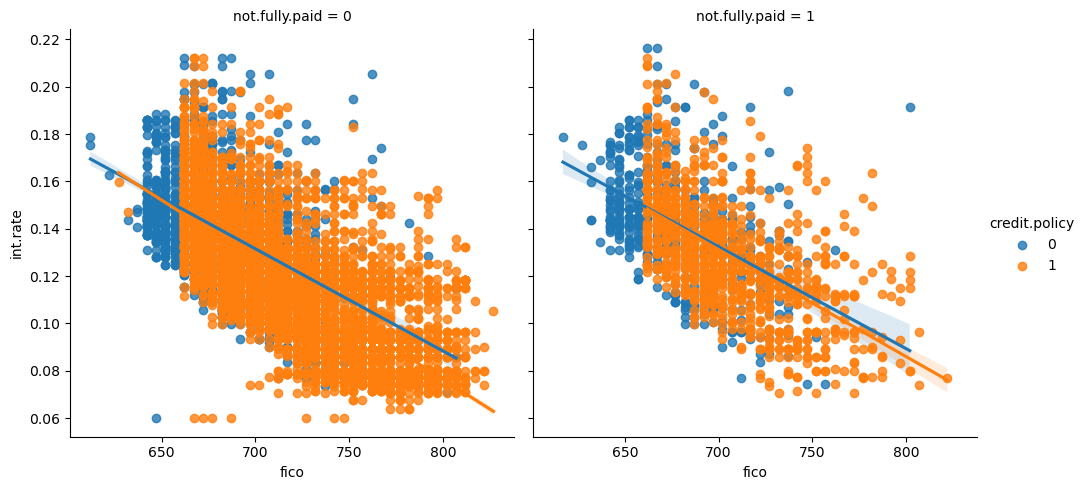

In [18]:
sns.lmplot(x='fico',y='int.rate',data=df,col='not.fully.paid',hue='credit.policy')

# Arranging Data for Random Forest

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Purpose column has a 'object' data type which is categorical data and Random Forest only contains numeric data. So, we have to clean it and make it in numeric form.

In [20]:
purpose_col = ['purpose']
df_final = pd.get_dummies(data=df,columns=purpose_col,drop_first=True)

In [21]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Train Test and Split Data 

In [22]:
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6704, 18), (2874, 18), (6704,), (2874,))

# Train and Test ML Model For Desicion Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
dtree_pred = dtree.predict(X_test)

# Accuracy and Evaluation For Decision Tree

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2408
           1       0.20      0.20      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



In [36]:
print(confusion_matrix(y_test,dtree_pred))

[[2016  392]
 [ 371   95]]


# Train and Test ML Model For Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=300) #You can play around different values of n_estimators.
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [40]:
rfc_pred = rfc.predict(X_test)

# Accuracy and Evaluation For Random Forest

In [41]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.43      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874



In [42]:
print(confusion_matrix(y_test,rfc_pred))

[[2396   12]
 [ 457    9]]


# Conclusion

So, As we observe from above model accuracies we are able to conclude that neither 'Decision Tree' nor 'Random Forest' model perform well bcz if we take a look at 'Decision Tree' model Precision, Recall and F1-Score is work well for 0 but, does't for 1. As same as in 'Random Forest' model, for 0 Precision, Recall and F1-Score work well but, for 1 it is going to be worse than 'Decision Tree' model (mainly in recall and f1-score).

To make a better accuracy we have to apply some more data cleaning or other operations. If you want to do it go ahead. But, this is just a example that how 'Decision Tree' and 'Random Forest' work.

# Important Topics You Must Know Before Starting The Project

1. Decision Tree
2. Random Forest
3. Accuray Terms (Percision, Recall and F1-Score)
4. Classification Report
5. Confusion Matrix
6. Get Dummies Method ('Arranging Data For Random Forest' Part)

Be Happy and Keep Learning :)